In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('Datas/train.csv')

In [5]:
print(data.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [6]:
l = data['label']

In [7]:
d = data.drop("label", axis = 1)

In [8]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


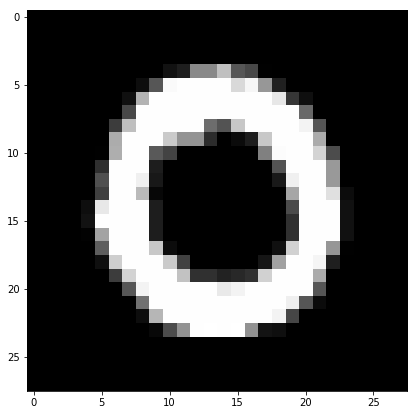

0


In [9]:
plt.figure(figsize = (7, 7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [10]:
# 2D Visualisation using PCA

In [25]:
labels = l.head(15000)
data = d.head(15000)

print("The shape of sample data = ", data.shape)

The shape of sample data =  (15000, 784)


In [13]:
# Data Preprocessing: Standardising the Data

In [14]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(data)
print(standardised_data.shape)

(15000, 784)


In [26]:
sample_data = standardised_data

covar_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of variance matrix =", covar_matrix.shape)

The shape of variance matrix = (784, 784)


In [27]:
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals = (782, 783))

print("Shape of eigen vectors = ", vectors.shape)
vectors = vectors.T
print("Updated Shape of eigen vectors = ", vectors.shape)


Shape of eigen vectors =  (784, 2)
Updated Shape of eigen vectors =  (2, 784)


In [28]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print("Resultant new data points' shape", vectors.shape, "X", sample_data)

Resultant new data points' shape (2, 784) X [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
import pandas as pd

new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data = new_coordinates, columns = ("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


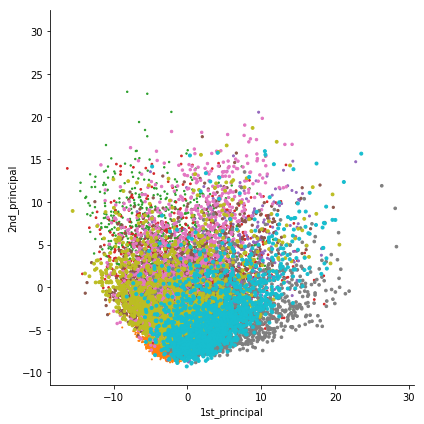

In [34]:
import seaborn as sns
sns.FacetGrid(dataframe, hue = "label", size = 6).map(plt.scatter, '1st_principal', '2nd_principal', 'label')
plt.show()

In [35]:
# PCA using Scikit Learn

In [36]:
from sklearn import decomposition
pca = decomposition.PCA()

In [37]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("Shape of pca_reduced.shape =", pca_data.shape)

Shape of pca_reduced.shape = (15000, 2)


In [42]:
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data = pca_data, columns = ('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(pca_df, hue = "label", size = 6).map(plt.scatter, '1st_principal', '2nd_principal', 'label')
plt.show()

ValueError: Shape of passed values is (7, 15000), indices imply (3, 15000)

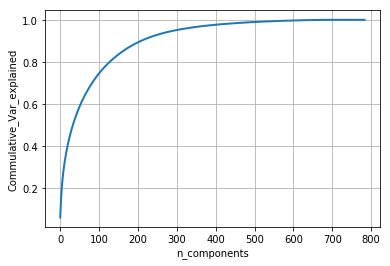

In [43]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize = (6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis("tight")
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Commulative_Var_explained')
plt.show()